In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# A connectivity-based algorithm: Agglomerative clustering

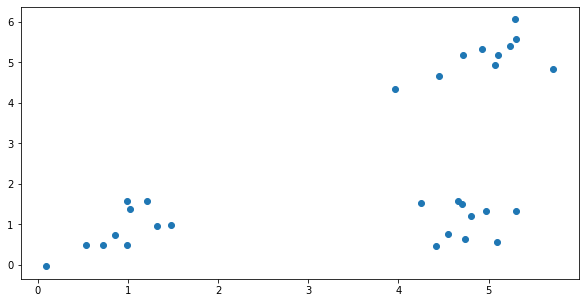

In [11]:
means = [np.array([1, 1]), np.array([5, 5]), np.array([5, 1])]
covariance = np.array([[0.25, 0], [0, 0.25]])
n_points = 10

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.show()

## Agglomerative clustering algorithm

__Objective__: Recursively merges pair of clusters of sample data.


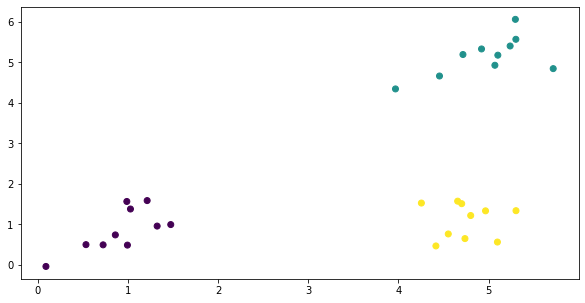

In [12]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
clusters = ac.fit_predict(all_data)

plt.scatter(all_data[:, 0], all_data[:,1], c=clusters)
plt.show()

Plot Dendrogram


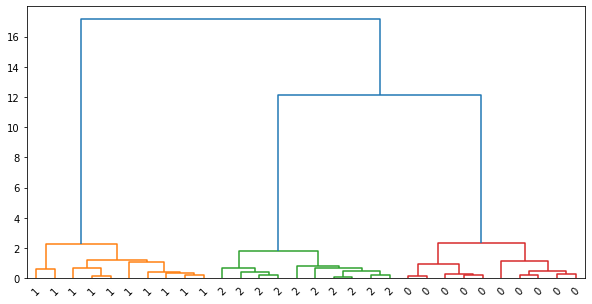

In [14]:
from scipy.cluster.hierarchy import dendrogram

print("Plot Dendrogram")

ac = AgglomerativeClustering(n_clusters=3, compute_distances=True)
clusters = ac.fit(all_data)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.c_[children, distances, n_observations]

dendrogram(linkage_matrix, labels=ac.labels_)
plt.show()

## Choose optimal number of clusters K

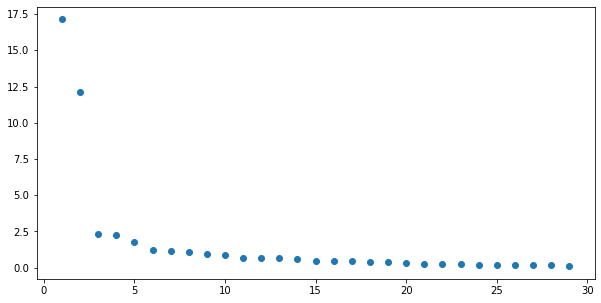

In [24]:
x = np.arange(3*n_points-1, 0, -1)
y = ac.distances_

plt.scatter(x, y)
plt.show()

## Linkage

- __average__: uses the average of the distances of each observation of the two sets.
- __complete__: linkage uses the maximum distances between all observations of the two sets.
- __single__: uses the minimum of the distances between all observations of the two sets.
- __ward__: minimizes the variance of the clusters being merged.

<img src="images/aggloClustering_linkage_comparison.png" width="500px"/>